In [8]:
import os
from tqdm import tqdm
import numpy as np
import random, torch
import pandas as pd
from glob import glob
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white', font_scale=1.3)

from statannotations.Annotator import Annotator

In [9]:
from glob import glob

In [10]:
csvs = glob('./CTCT/*/performance.csv')

In [11]:
res = []
for csv in csvs:
    df = pd.read_csv(csv,index_col=0)
    df = df[df.Test_cohort != df.Train_cohort]
    res.append(df)

In [12]:
test_performance = pd.concat(res)
order = ['FFT', 'PFT', 'LFT', 'NFT']
box_pairs = [('FFT', 'NFT'), ('NFT', 'PFT')] #, ('notask', 'rps'), ('notask', 'ctc')

/tmp/ipykernel_20089/3869835276.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


Text(0, 0.5, 'CTCT ROC')

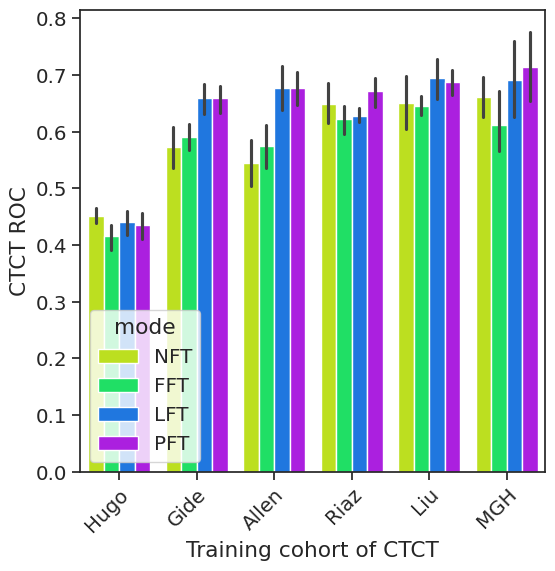

In [13]:
fig, ax = plt.subplots(figsize=(6,6))

data = test_performance.reset_index(drop=True)
x = 'Train_cohort'
y = 'ROC'
hue = 'mode'
hue_order = ['NFT', 'FFT', 'LFT', 'PFT']

x_order = data.groupby(x)[['ROC', 'PRC']].mean().mean(axis=1).sort_values().index.tolist()

palette = sns.palettes.color_palette('hsv', len(order))


res = []
for r in x_order:
    data1 = data[data[x] == r]
    res.append(data1)
data = pd.concat(res)

sns.barplot(data = data, x = x, y = y, hue = hue, order = x_order, errorbar=('ci', 50),
            hue_order= hue_order, ax = ax,  palette = palette,)

#sns.lineplot(data = data, x = x, y = y, hue = hue, errorbar=('ci', 50), )


ax.tick_params(axis='both', which='major', right = False, top=False, direction = 'out',reset = True)
# #fig.savefig('./avg_refined_distribution.pdf')
ax.set_xticklabels(
    x_order, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor")  # <====== HERE is the ke

ax.set_xlabel('Training cohort of CTCT')
ax.set_ylabel('CTCT %s' % y)

/tmp/ipykernel_20089/2651942895.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


Text(0, 0.5, 'CTCT PRC')

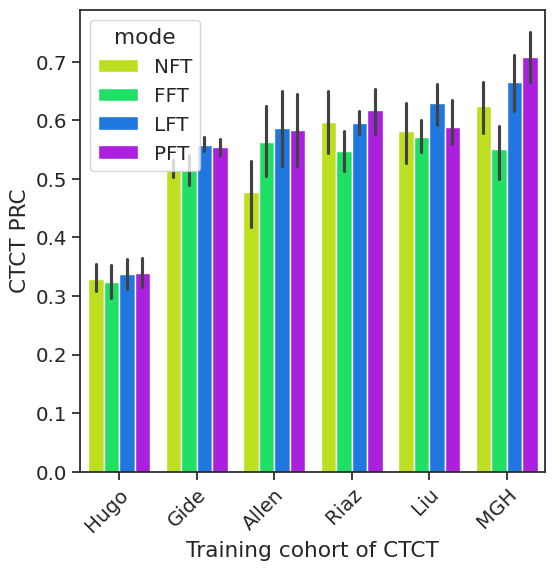

In [17]:
fig, ax = plt.subplots(figsize=(6,6))

y = 'PRC'

sns.barplot(data = data, x = x, y = y, hue = hue, order = x_order, errorbar=('ci', 50),
            hue_order= hue_order, ax = ax,  palette = palette,)

#sns.lineplot(data = data, x = x, y = y, hue = hue, errorbar=('ci', 50), )

ax.tick_params(axis='both', which='major', right = False, top=False, direction = 'out',reset = True)
# #fig.savefig('./avg_refined_distribution.pdf')
ax.set_xticklabels(
    x_order, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor")  # <====== HERE is the ke

ax.set_xlabel('Training cohort of CTCT')
ax.set_ylabel('CTCT %s' % y)

/tmp/ipykernel_20089/3863973309.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


Text(0, 0.5, 'CTCT F1')

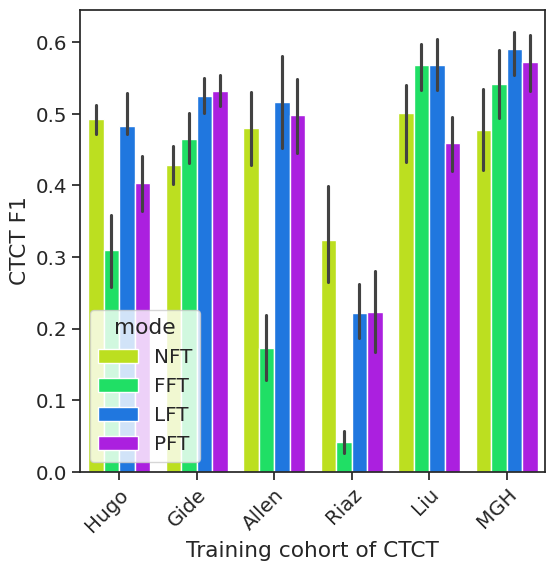

In [16]:
fig, ax = plt.subplots(figsize=(6,6))

y = 'F1'

sns.barplot(data = data, x = x, y = y, hue = hue, order = x_order, errorbar=('ci', 50),
            hue_order= hue_order, ax = ax,  palette = palette,)

#sns.lineplot(data = data, x = x, y = y, hue = hue, errorbar=('ci', 50), )

ax.tick_params(axis='both', which='major', right = False, top=False, direction = 'out',reset = True)
# #fig.savefig('./avg_refined_distribution.pdf')
ax.set_xticklabels(
    x_order, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor")  # <====== HERE is the ke

ax.set_xlabel('Training cohort of CTCT')
ax.set_ylabel('CTCT %s' % y)